# Bird_Monitoring_Data_FOREST

In [1]:
import pandas as pd
import numpy as np
#file path
path='Bird_Monitoring_Data_FOREST.xlsx'

#read the multiple excel sheets
excel_file = pd.ExcelFile(path)

#get all sheet names
sheet_names=excel_file.sheet_names

 #read data from all sheets into dictionary
sheet_dict={sheet:excel_file.parse(sheet) for sheet in sheet_names}

 #convert into single dataframe 
combined_df1=pd.concat(
     [df.assign(sheet=sheet_name)for sheet_name,df in sheet_dict.items()],
  ignore_index=True
 )
 
 # #drop the column sheet
df=combined_df1.drop(columns=['sheet'])

missing_values=df.isnull().sum()

missing_percentage=(df.isnull().sum() / len (df)*100)

print('missing values:\n',missing_values)
print('missing percentage\n',missing_percentage)


missing values:
 Admin_Unit_Code                   0
Sub_Unit_Code                  7824
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance

In [2]:
#Categorical data
cat_data=[col for col in df.columns if df[col].dtype=='object']
print('categorical Data:\n',cat_data)

# Numerical data
num_data=[col for col in df.columns if df[col].dtype!='object']
print('Numerical Data :\n',num_data)

categorical Data:
 ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Start_Time', 'End_Time', 'Observer', 'Interval_Length', 'ID_Method', 'Distance', 'Sex', 'Common_Name', 'Scientific_Name', 'AOU_Code', 'Sky', 'Wind', 'Disturbance']
Numerical Data :
 ['Year', 'Date', 'Visit', 'Flyover_Observed', 'AcceptedTSN', 'NPSTaxonCode', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Initial_Three_Min_Cnt']


In [3]:
# check is there is any duplicate value comes
df.duplicated().sum()

np.int64(0)

In [4]:
# check the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8546 non-null   object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    8546 non-null   object        
 4   Location_Type                8546 non-null   object        
 5   Year                         8546 non-null   int64         
 6   Date                         8546 non-null   datetime64[ns]
 7   Start_Time                   8546 non-null   object        
 8   End_Time                     8546 non-null   object        
 9   Observer                     8546 non-null   object        
 10  Visit                        8546 non-null   int64         
 11  Interval_Length              8546 non-null 

In [5]:

#Drop the column sex because  90% of null value accurs
df.drop(columns=['Sex'],inplace=True)

#Drop the column sub units code because 60% null values accurs
df.drop(columns=['Sub_Unit_Code'],inplace=True)

# impute the missing data

In [6]:
#impute the data for missing values using mode for the categorical data
mode_value1=df['ID_Method'].mode()[0]
df['ID_Method']=df['ID_Method'].fillna(mode_value1)

mode_value2=df['Distance'].mode()[0]
df['Distance']=df['Distance'].fillna(mode_value2)

#using mean for the numerical data
mean_value3=df['AcceptedTSN'].mean()
df['AcceptedTSN']=df['AcceptedTSN'].fillna(mean_value3)


print(mode_value1)
print(mode_value2)
print(mean_value3)


Singing
<= 50 Meters
246572.35902541876


In [7]:
#convert the file into data frame 
f1=pd.DataFrame(df)

In [8]:
#convert the data frame into csv
f1.to_csv('FOREST.csv',index=False)

In [9]:
# chech there is any null values after clean the  data
f1.isnull().sum()

Admin_Unit_Code                0
Site_Name                      0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Common_Name                    0
Scientific_Name                0
AcceptedTSN                    0
NPSTaxonCode                   0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
dtype: int64

In [10]:
f1

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,88350,CARW,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8542,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,87136,AMRO,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8543,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,85824,ACFL,False,True,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False
8544,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,94228,NOCA,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True


# EDA

In [11]:
f1.head(500)

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CATO,CATO 3,CATO-0094,Forest,2018,2018-05-25,07:00:00,07:10:00,Kimberly Serno,1,...,87156,WOTH,True,True,18.4,69.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,True
496,CATO,CATO 3,CATO-0094,Forest,2018,2018-05-25,07:00:00,07:10:00,Kimberly Serno,1,...,87156,WOTH,True,True,18.4,69.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False
497,CATO,CATO 3,CATO-0094,Forest,2018,2018-05-25,07:00:00,07:10:00,Kimberly Serno,1,...,84865,RBWO,False,False,18.4,69.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,True
498,CATO,CATO 3,CATO-0094,Forest,2018,2018-05-25,07:00:00,07:10:00,Kimberly Serno,1,...,95300,AMGO,False,False,18.4,69.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,True


In [12]:
f1.tail(100)

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
8446,WOTR,WOTR,WOTR-0004,Forest,2018,2018-06-02,07:26:00,07:36:00,Elizabeth Oswald,1,...,93587,REVI,False,False,23.0,87.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,True
8447,WOTR,WOTR,WOTR-0004,Forest,2018,2018-06-02,07:26:00,07:36:00,Elizabeth Oswald,1,...,86252,BLJA,False,False,23.0,87.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,True
8448,WOTR,WOTR,WOTR-0004,Forest,2018,2018-06-02,07:26:00,07:36:00,Elizabeth Oswald,1,...,85846,EAWP,False,True,23.0,87.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,True
8449,WOTR,WOTR,WOTR-0004,Forest,2018,2018-06-02,07:26:00,07:36:00,Elizabeth Oswald,1,...,84936,DOWO,False,True,23.0,87.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False
8450,WOTR,WOTR,WOTR-0004,Forest,2018,2018-06-02,07:26:00,07:36:00,Elizabeth Oswald,1,...,88350,CARW,False,False,23.0,87.699997,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,No effect on count,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,88350,CARW,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8542,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,87136,AMRO,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8543,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,85824,ACFL,False,True,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False
8544,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,94228,NOCA,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True


In [13]:
# using describe to see the summary stats
f1.describe()

,Year,Date,Visit,AcceptedTSN,NPSTaxonCode,Temperature,Humidity
count,8546.0,8546,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000
mean,2018.0,2018-06-12 21:17:23.856775168,1.487245,246572.359025,137088.791013,21.871507,77.757032
min,2018.0,2018-05-07 00:00:00,1.000000,174717.000000,76625.000000,11.000000,17.500000
25%,2018.0,2018-05-29 00:00:00,1.000000,178359.000000,85846.000000,19.400000,72.500000
50%,2018.0,2018-06-12 00:00:00,1.000000,179021.000000,88350.000000,21.900000,78.800003
75%,2018.0,2018-07-01 00:00:00,2.000000,179759.000000,94215.000000,24.299999,84.300003
max,2018.0,2018-07-15 00:00:00,2.000000,950106.000000,926917.000000,34.400002,97.900002
std,0.0,NaN,0.499867,181669.079534,154932.276585,3.652511,9.296123


In [14]:
# see the summary stats by index
f1.describe(include='object').T

,count,unique,top,freq
Admin_Unit_Code,8546,11,PRWI,2463
Site_Name,8546,70,CHOH 1,420
Plot_Name,8546,408,CHOH-0812,42
Location_Type,8546,1,Forest,8546
Start_Time,8546,282,06:50:00,107
End_Time,8546,283,07:00:00,107
Observer,8546,3,Elizabeth Oswald,3285
Interval_Length,8546,4,0-2.5 min,4410
ID_Method,8546,3,Singing,5431
Distance,8546,2,<= 50 Meters,4402


In [15]:
f1.shape

(8546, 27)

Season
summer    6156
spring    2390
Name: count, dtype: int64


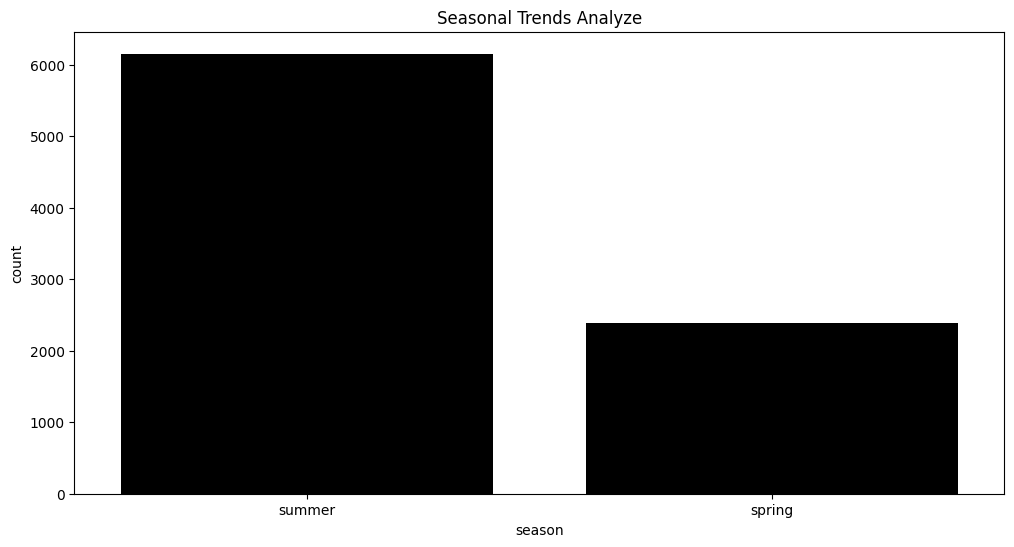

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

forest_df = pd.read_csv('FOREST.csv')

# Seasonal Trends Analyze
forest_df['Date'] = pd.to_datetime(forest_df['Date'])
forest_df['Month'] = forest_df['Date'].dt.month

def forest(date):
    if date in [12,1,2]:
     return 'winter'
    elif date in [3,4,5]:
       return 'spring'
    elif date in [6,7,8]:
       return 'summer'
    else:
        return 'fall'

forest_df['Season']=forest_df['Month'].apply(forest)
count=forest_df['Season'].value_counts()
print(count)

plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values,color='black')
plt.title('Seasonal Trends Analyze')
plt.xlabel('season')
plt.ylabel('count')
plt.show()

Start_Time
5      634
6     2289
7     2331
8     1920
9      979
10     393
Name: count, dtype: int64
End_Time
5      316
6     2211
7     2349
8     1978
9     1199
10     493
Name: count, dtype: int64


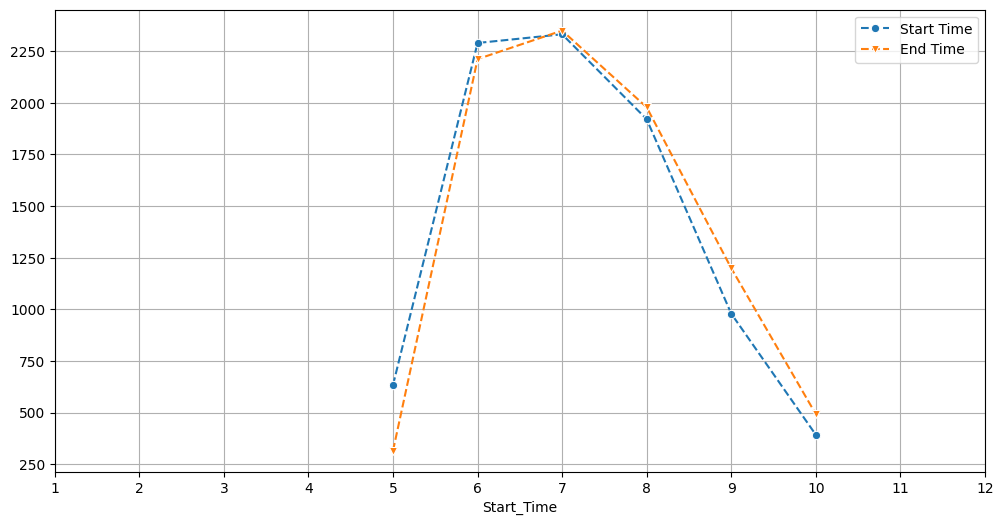

In [17]:
# Observation Time

forest_df['Start_Time']=pd.to_datetime(forest_df['Start_Time'],format='%H:%M:%S').dt.hour
forest_df['End_Time']=pd.to_datetime(forest_df['End_Time'],format='%H:%M:%S').dt.hour

forest_st=forest_df['Start_Time'].value_counts().sort_index()
forest_En=forest_df['End_Time'].value_counts().sort_index()

print(forest_st)
print(forest_En)

plt.figure(figsize=(12,6))
sns.lineplot(x=forest_st.index,y=forest_st.values,marker='o',linestyle='--',label='Start Time')
sns.lineplot(x=forest_En.index,y=forest_En.values,marker='v',linestyle='--',label='End Time')
plt.legend()
plt.xticks(range(1,13))
plt.grid()
plt.show()


Location_Type
Forest       8546
Grassland    6826
Name: count, dtype: int64


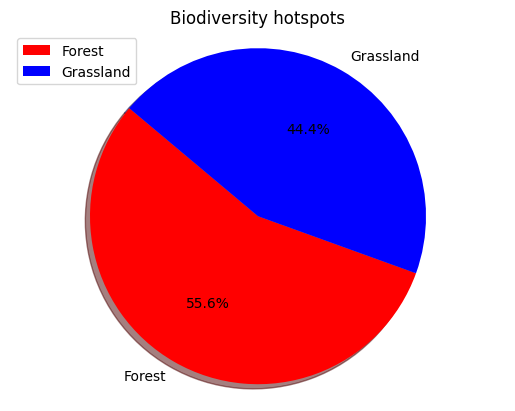

In [18]:
# Location Insights
Grassland='Grassland.csv'
grass=pd.read_csv(Grassland)

forest='FOREST.csv'
fore=pd.read_csv(forest)

com=pd.concat(
    [grass,fore]
)
loc=com['Location_Type'].value_counts()
print(loc)

plt.pie(loc.values,labels=loc.index,autopct='%1.1f%%',colors=['red','blue'],shadow=True, startangle=140)
plt.legend()
plt.title('Biodiversity hotspots')
plt.axis('equal')
plt.show()

Plot_Name
CHOH-0812    42
NACE-0477    39
CHOH-1081    38
NACE-0491    35
MONO-0074    35
ANTI-0036    34
CHOH-0986    34
CHOH-0806    34
CHOH-0002    34
CHOH-0262    33
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3848196418.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot.index,y=plot.values,palette='viridis')


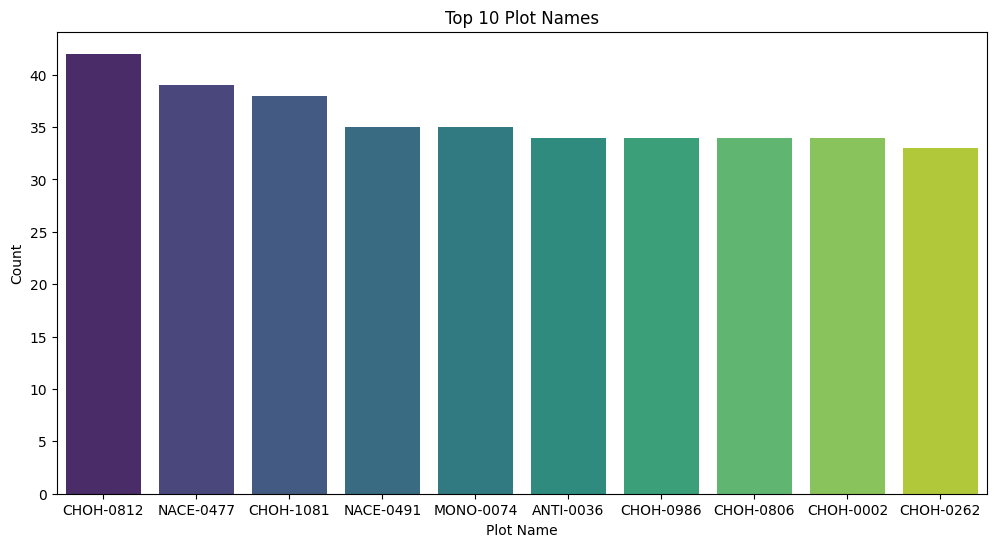

In [19]:
# Plot-Level Analysis

plot=fore['Plot_Name'].value_counts().nlargest(10)
print(plot.head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=plot.index,y=plot.values,palette='viridis')
plt.xlabel("Plot Name")
plt.ylabel("Count")
plt.title("Top 10 Plot Names")
plt.show()

127
  Location_Type  unique Species count
0        Forest                   108
1     Grassland                   107


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\856570971.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loc,x='Location_Type',y='unique Species count',palette='viridis')


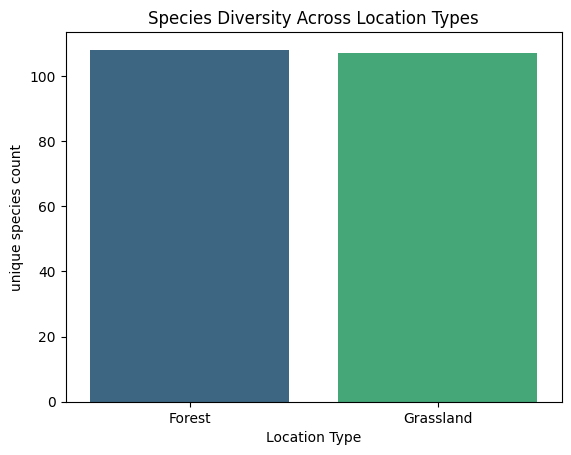

In [20]:
# Diversity Metrics

forest='FOREST.csv'
fore=pd.read_csv(forest)

Grassland='Grassland.csv'
grass=pd.read_csv(Grassland)

cat=pd.concat(
    [fore,grass]
)

scie=cat['Scientific_Name'].nunique()
print(scie)

loc=cat.groupby('Location_Type')['Scientific_Name'].nunique().reset_index()
loc.columns=['Location_Type','unique Species count']
print(loc)

plt.Figure(figsize=(10,6))
sns.barplot(data=loc,x='Location_Type',y='unique Species count',palette='viridis')
plt.xlabel('Location Type')
plt.ylabel('unique species count')
plt.title('Species Diversity Across Location Types')
plt.xticks()
plt.show()


Interval_Length
0-2.5 min       4410
2.5 - 5 min     1722
5 - 7.5 min     1295
7.5 - 10 min    1119
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\458103585.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=act.index,y=act.values,palette='viridis')


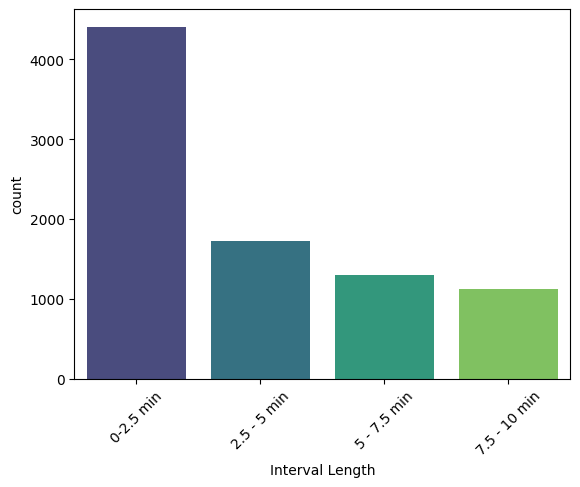

In [21]:
#Interval_Length 

act=fore['Interval_Length'].value_counts()
print(act)

plt.Figure(figsize=(10,6))
sns.barplot(x=act.index,y=act.values,palette='viridis')
plt.xlabel('Interval Length')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

ID_Method
Singing          5431
Calling          2677
Visualization     438
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3152036336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ID.index,y=ID.values,palette='coolwarm')


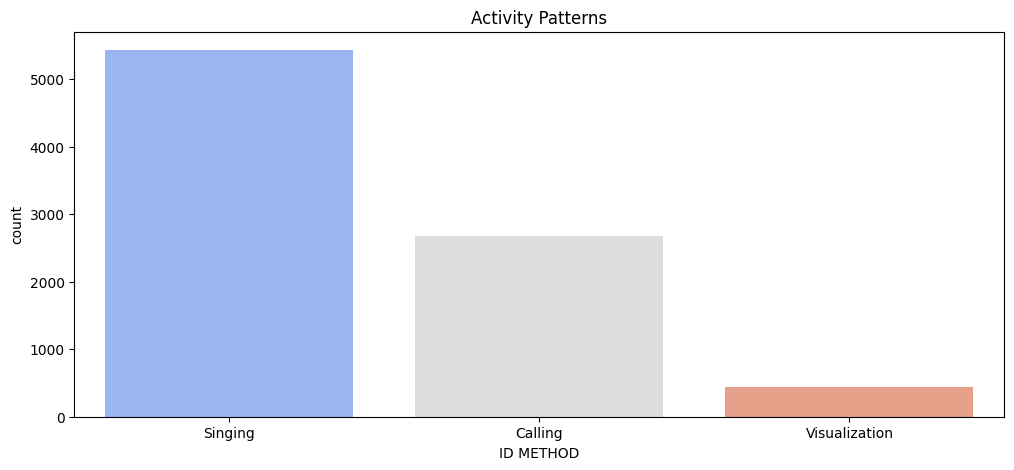

In [22]:
# ID_Method

ID=fore['ID_Method'].value_counts()
print(ID)

plt.figure(figsize=(12,5))
sns.barplot(x=ID.index,y=ID.values,palette='coolwarm')
plt.xlabel('ID METHOD')
plt.ylabel('count')
plt.title('Activity Patterns')
plt.show()

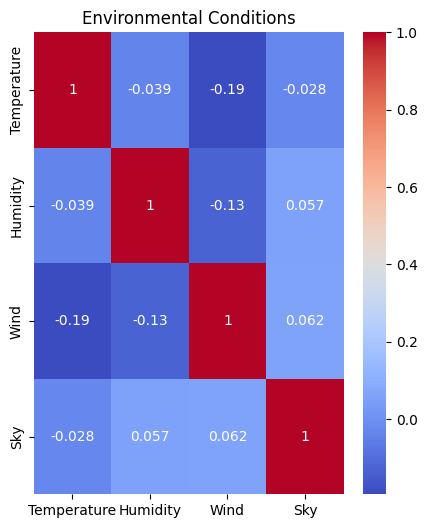

In [23]:
# Weather Correlation
from sklearn.preprocessing import LabelEncoder

En_code=LabelEncoder()
fore['Common_Name']=En_code.fit_transform(fore['Common_Name'])
fore['Sky']=En_code.fit_transform(fore['Sky'])
fore['Wind']=En_code.fit_transform(fore['Wind'])



corr=fore[['Temperature','Humidity','Wind','Sky']].corr()

plt.figure(figsize=(5,6))
sns.heatmap(data=corr,annot=True,cmap='coolwarm')
plt.title('Environmental Conditions')
plt.show()

Disturbance
No effect on count          4853
Slight effect on count      2691
Moderate effect on count     811
Serious effect on count      191
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\868340663.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Dist,palette='viridis')


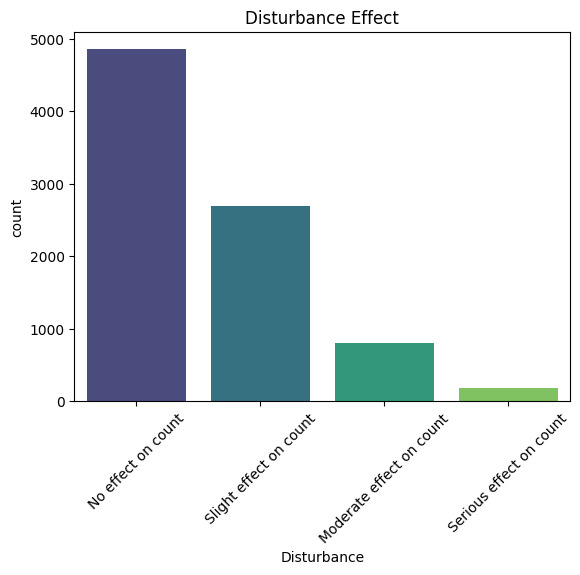

In [24]:
# Distribution
Dist=fore['Disturbance'].value_counts()
print(Dist)

plt.Figure(figsize=(10,8))
sns.barplot(data=Dist,palette='viridis')
plt.xticks(rotation=45)
plt.title('Disturbance Effect')
plt.show()

Distance
<= 50 Meters       4402
50 - 100 Meters    4144
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\4161849267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Distance,palette='viridis')


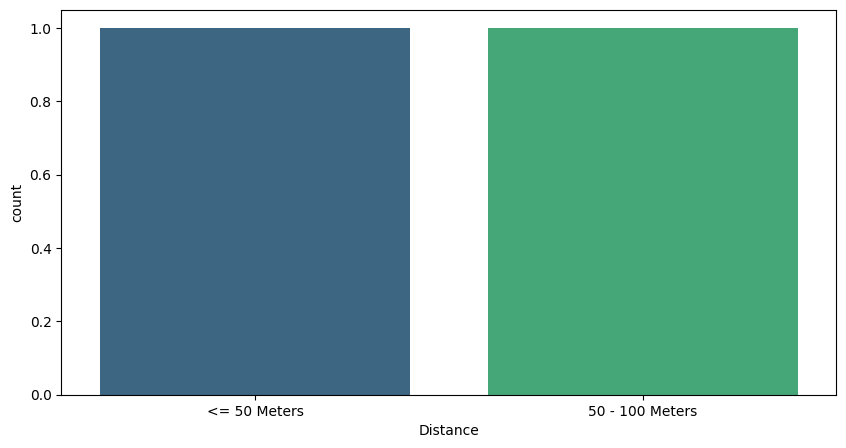

In [25]:
# Distance Analysis

Distance=fore['Distance'].value_counts()
print(Distance)

plt.figure(figsize=(10,5))
sns.countplot(data=Distance,palette='viridis')
plt.show()

Flyover_Observed
False    8454
True       92
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\1404413959.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Flyover_Observed,palette=['black','blue'])


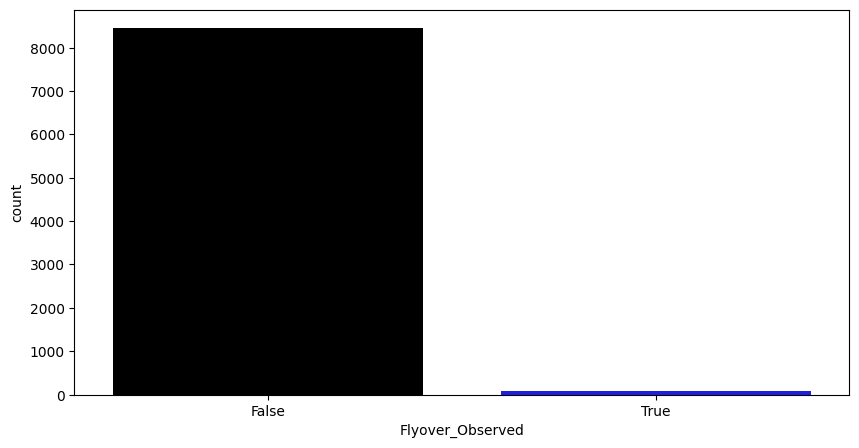

In [26]:
# Flyover_Observed

Flyover_Observed=fore['Flyover_Observed'].value_counts()
print(Flyover_Observed)

plt.figure(figsize=(10,5))
sns.barplot(data=Flyover_Observed,palette=['black','blue'])
plt.show()

Observer
Elizabeth Oswald    3285
Kimberly Serno      2910
Brian Swimelar      2351
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\804563363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Observer,palette='viridis')


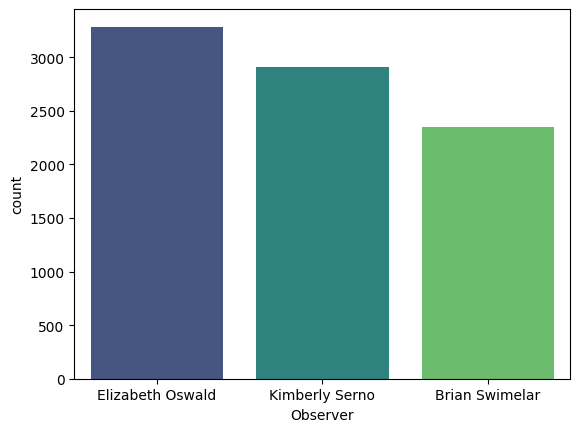

In [27]:
# Observer Bias

Observer=fore['Observer'].value_counts().nlargest(10)
print(Observer)

plt.Figure(figsize=(12,7))
sns.barplot(data=Observer,palette='viridis')
plt.show()

Visit
1    4382
2    4164
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\2528389364.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Visit,palette='viridis')


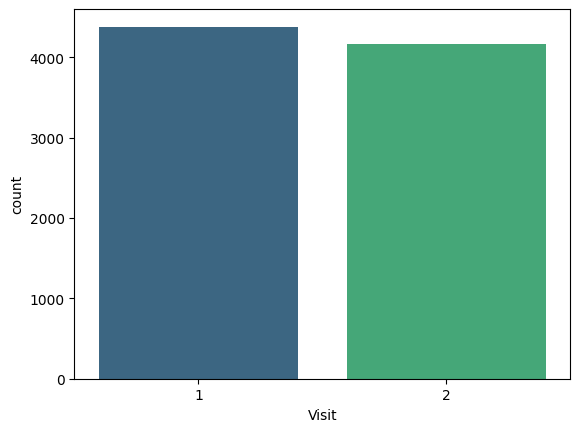

In [28]:
# Visit 

Visit=fore['Visit'].value_counts()
print(Visit)

plt.Figure(figsize=(10,7))
sns.barplot(data=Visit,palette='viridis')
plt.show()

PIF_Watchlist_Status
False    8208
True      338
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\1925219265.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=PIF,palette='viridis')


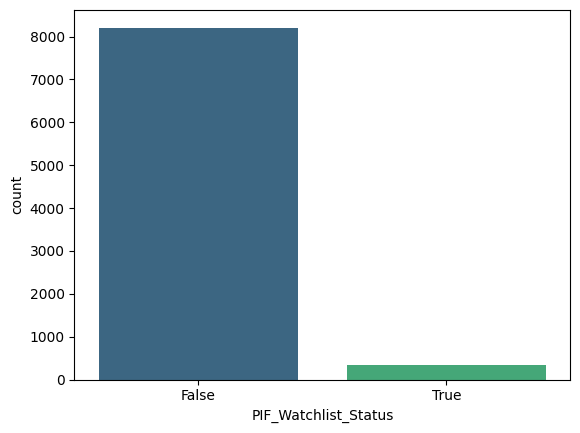

In [29]:
# PIF_Watchlist_Status 

PIF=fore['PIF_Watchlist_Status'].value_counts()
print(PIF)

plt.Figure(figsize=(10,7))
sns.barplot(data=PIF,palette='viridis')
plt.show()

Regional_Stewardship_Status
False    6101
True     2445
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3821525047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Regional,palette='viridis')


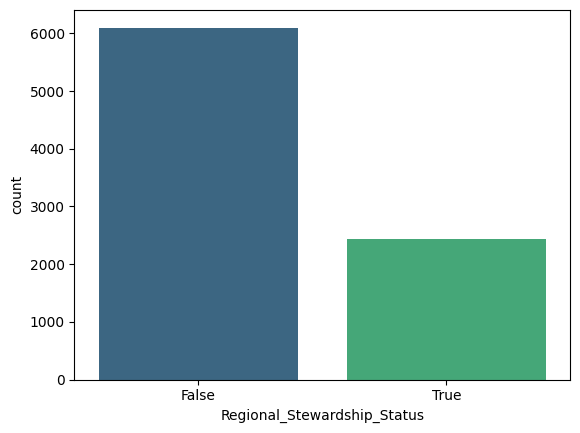

In [30]:
# Regional_Stewardship_Status

Regional=fore['Regional_Stewardship_Status'].value_counts()
print(Regional)

plt.Figure(figsize=(10,7))
sns.barplot(data=Regional,palette='viridis')
plt.show()

AOU_Code
REVI    694
CARW    646
NOCA    595
ETTI    541
EAWP    486
ACFL    436
RBWO    398
BGGN    310
OVEN    303
AMRO    294
WOTH    290
CACH    273
BLJA    213
DOWO    208
SCTA    199
WBNU    188
MODO    162
GCFL    154
INBU    150
AMGO    147
AMCR    142
BHCO    136
YBCU    133
NOPA    114
EATO     98
PIWO     96
HOWA     64
CHSP     58
YTVI     55
CEDW     51
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_9348\3738659372.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=AOU.index,y=AOU.values,palette='viridis')


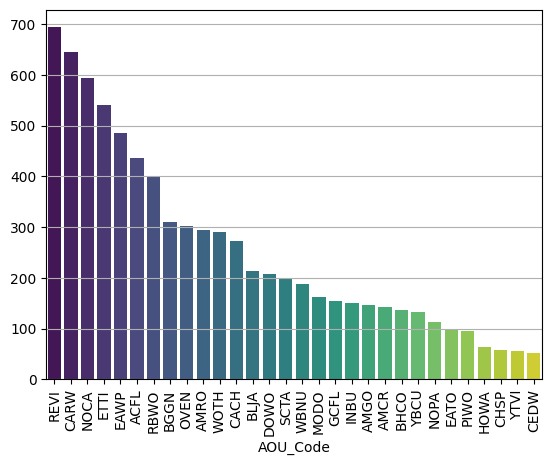

In [31]:
# AOU Code Patterns

AOU=fore['AOU_Code'].value_counts().nlargest(30)
print(AOU)

plt.Figure(figsize=(20,10))
sns.barplot(x=AOU.index,y=AOU.values,palette='viridis')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# SQL

In [48]:
#sql connection

import pandas as pd
import pymysql

conn=pymysql.connect(
host='localhost',
user='root',
password='Janakiramanjohn1330@',
database='birdforest'
)
mycursor=conn.cursor()


In [ ]:
conn # check the connection

In [ ]:
f='FOREST.csv' #load dataset
df=pd.read_csv(f)


In [ ]:
# writing query for creating a table
q1="""
   create table forest(
        Admin_Unit_Code VARCHAR(100),
        Site_Name VARCHAR(100),
        Plot_Name VARCHAR(100),
        Location_Type VARCHAR(100),
        Year INT,
        Date DATE,	
        Start_Time TIME,
        End_Time TIME,
        Observer VARCHAR(50),
        Visit INT,
        Interval_Length VARCHAR(50),
        ID_Method VARCHAR(100),
        Distance VARCHAR(100),
        Flyover_Observed VARCHAR(50),
        Common_Name VARCHAR(100),
        Scientific_Name VARCHAR(100),
        AcceptedTSN INT,
        NPSTaxonCode INT,
        AOU_Code VARCHAR(50),
        PIF_Watchlist_Status VARCHAR(50),
        Regional_Stewardship_Status VARCHAR(50),
        Temperature FLOAT,
        Humidity FLOAT,
        Sky VARCHAR(50),
        Wind VARCHAR(50),
        Disturbance VARCHAR(100),
        Initial_Three_Min_Cnt VARCHAR(50)
)"""

mycursor.execute(q1)
conn.commit()

In [ ]:
#inserting the values into the table
insert = """
   INSERT INTO forest (
       Admin_Unit_Code, Site_Name, Plot_Name, Location_Type, Year, Date, Start_Time, End_Time,
       Observer, Visit, Interval_Length, ID_Method, Distance, Flyover_Observed, Common_Name,
       Scientific_Name, AcceptedTSN, NPSTaxonCode, AOU_Code, PIF_Watchlist_Status, 
       Regional_Stewardship_Status, Temperature, Humidity, Sky, Wind, Disturbance, 
       Initial_Three_Min_Cnt
   ) 
   VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
# using for loop to iterate the rows
for index, row in df.iterrows():
    mycursor.execute(insert, (
        row['Admin_Unit_Code'], row['Site_Name'], row['Plot_Name'], row['Location_Type'],
        row['Year'], row['Date'], row['Start_Time'], row['End_Time'], row['Observer'],
        row['Visit'], row['Interval_Length'], row['ID_Method'], row['Distance'],
        row['Flyover_Observed'], row['Common_Name'], row['Scientific_Name'],
        row['AcceptedTSN'], row['NPSTaxonCode'], row['AOU_Code'],  
        row['PIF_Watchlist_Status'], row['Regional_Stewardship_Status'],
        row['Temperature'], row['Humidity'], row['Sky'], row['Wind'],
        row['Disturbance'], row['Initial_Three_Min_Cnt']
    ))
    conn.commit()
